In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_json("../bench_results_2024-05-28T12:13:51.json")
#df = pd.read_json("../bench_results_2024-06-01T14:54:52_120timeout_0retry.json")
#df = pd.read_json("../bench_results_2024-06-01T15:39:06_fewer_max_conn.json)
df.head()

,params,took,fails
0,"{'num_requests': 2000, 'max_connections': 100,...",3.062610,0
1,"{'num_requests': 2000, 'max_connections': 100,...",4.054247,0
2,"{'num_requests': 2000, 'max_connections': 100,...",8.005986,0
3,"{'num_requests': 2000, 'max_connections': 100,...",13.092656,0
4,"{'num_requests': 2000, 'max_connections': 300,...",3.465021,0


In [33]:
params = pd.json_normalize(df["params"])
df = df.join(params).drop(columns="params")

In [34]:
df

,took,fails,num_requests,max_connections,semaphore_fact,semaphore_value
0,3.062610,0,2000,100.0,1.0,100.0
1,4.054247,0,2000,100.0,1.2,120.0
2,8.005986,0,2000,100.0,1.5,150.0
3,13.092656,0,2000,100.0,2.0,200.0
4,3.465021,0,2000,300.0,1.0,300.0
5,12.456718,0,2000,300.0,1.2,360.0
6,36.157733,318,2000,300.0,1.5,450.0
7,63.179272,1018,2000,300.0,2.0,600.0
8,3.953127,0,2000,500.0,1.0,500.0
9,19.550548,422,2000,500.0,1.2,600.0


<Axes: xlabel='max_connections', ylabel='took'>

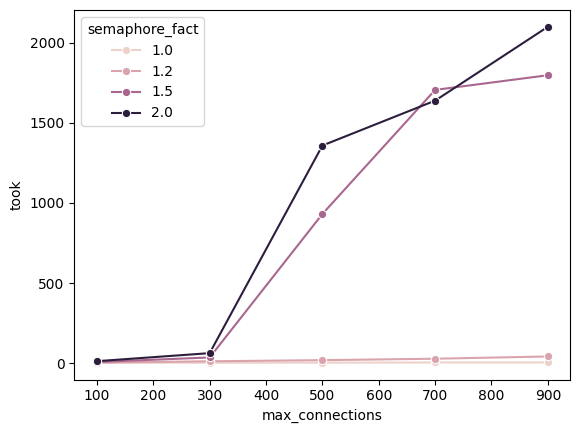

In [35]:
sns.lineplot(df, x="max_connections", y="took", hue="semaphore_fact", marker="o")
#plt.yscale("log")


<Axes: xlabel='max_connections', ylabel='fails'>

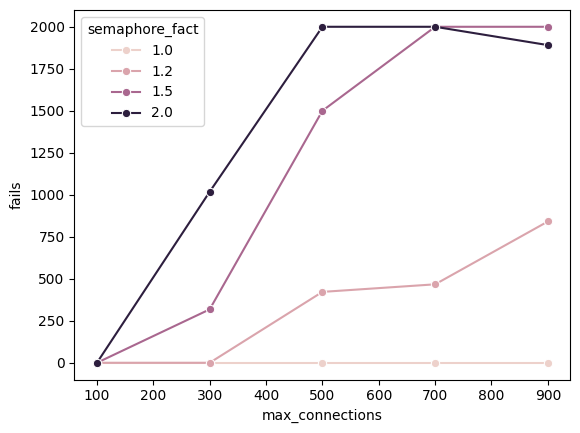

In [36]:
sns.lineplot(df, x="max_connections", y="fails", hue="semaphore_fact", marker="o")